In [2]:
import torch

USE_CUDA = torch.cuda.is_available()
print(USE_CUDA)

device = torch.device('cuda:0' if USE_CUDA else 'cpu')
print('학습을 진행하는 기기:',device)
print('cuda index:', torch.cuda.current_device())
print('gpu 개수:', torch.cuda.device_count())
print('graphic name:', torch.cuda.get_device_name())

cuda = torch.device('cuda')
print(cuda)

True
학습을 진행하는 기기: cuda:0
cuda index: 0
gpu 개수: 1
graphic name: GeForce 940MX
cuda


In [3]:
import fastbook
fastbook.setup_book()

NameError: name 'log_args' is not defined

In [4]:
import fastai
fastai.__version__
from fastai.vision.all import *

In [5]:
from fastbook import *
from fastai.vision.widgets import *

In [6]:
from IPython.display import display
from IPython.display import Image
from ipywidgets import widgets

In [7]:
from PIL import Image

In [8]:
# 데이터셋 로드 
path=Path('./dataset')
image_files = get_image_files(path)
image_files

(#3538) [Path('dataset/cactus/  (1).jpg'),Path('dataset/cactus/  (10).jpg'),Path('dataset/cactus/  (100).jpg'),Path('dataset/cactus/  (101).jpg'),Path('dataset/cactus/  (102).jpg'),Path('dataset/cactus/  (103).jpg'),Path('dataset/cactus/  (104).jpg'),Path('dataset/cactus/  (105).jpg'),Path('dataset/cactus/  (106).jpg'),Path('dataset/cactus/  (107).jpg')...]

In [9]:
# confusion matrix for your dataset 
# a screenshot of the output printed of the 10 images with the highest loss in your dataset 
# For each of the 10 images, give an explanation of why this image was included in the top loss plot, 
# and the resulting action you took. Did you remove the image, why? And if not, why did you include it? 

In [10]:
# 모델 / 모델 학습 / 학습 결과 
plants = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [11]:
dls = plants.dataloaders(path, num_workers=0)

dls.valid.show_batch(max_n=4, nrows=1)

### Resize

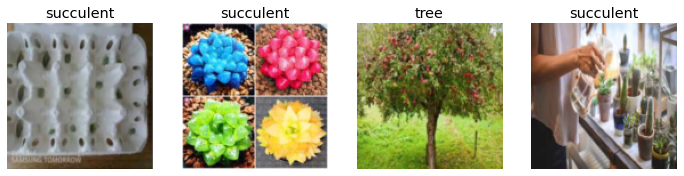

In [12]:
plants = plants.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = plants.dataloaders(path, num_workers=0)
dls.valid.show_batch(max_n=4, nrows=1)

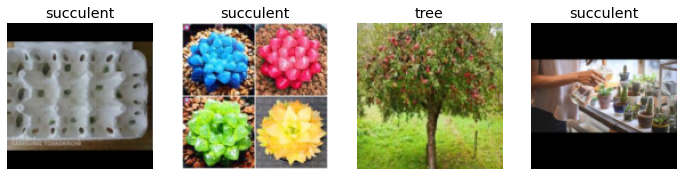

In [13]:
plants = plants.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = plants.dataloaders(path, num_workers=0)
dls.valid.show_batch(max_n=4, nrows=1)

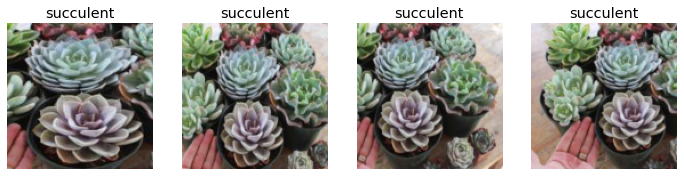

In [14]:
plants = plants.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = plants.dataloaders(path, num_workers=0)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

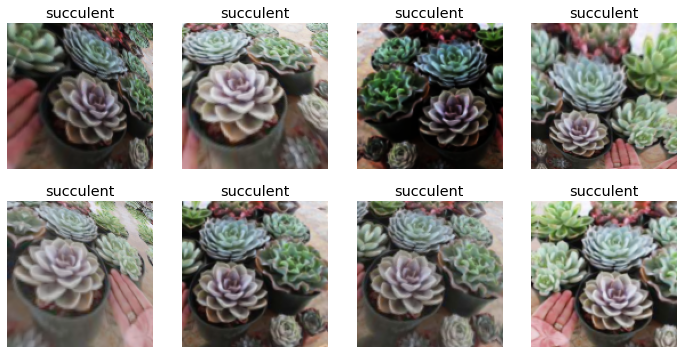

In [15]:
plants = plants.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = plants.dataloaders(path, num_workers=0)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

### Learn

In [16]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)  


epoch,train_loss,valid_loss,error_rate,time
0,1.548888,0.952792,0.339463,00:32


epoch,train_loss,valid_loss,error_rate,time
0,1.127349,0.876101,0.302687,00:41
1,1.062283,0.815868,0.318246,00:42
2,0.940046,0.741788,0.285714,00:43
3,0.828964,0.747729,0.292786,00:44


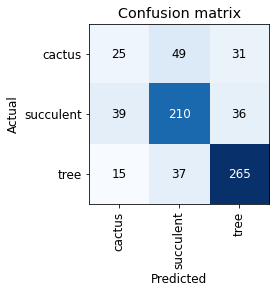

In [17]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

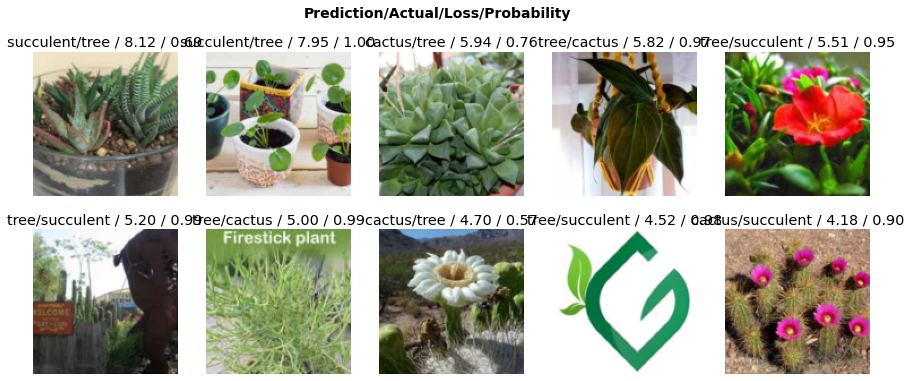

In [18]:
interp.plot_top_losses(10, nrows=2)

In [19]:
cleaner = ImageClassifierCleaner(learn)
cleaner

### Export

In [20]:
learn.export()

In [21]:
path=Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [22]:
learn_inf = load_learner(path/'export.pkl')

In [36]:
path = Path('/dataset/cactus/ (1).jpg')

In [56]:
#learn_inf.predict('/dataset/cactus/ (1).jpg')

In [38]:
learn_inf.dls.vocab

['cactus', 'succulent', 'tree']

In [39]:
# btn_upload = widgets.FileUpload()
# btn_upload

FileUpload(value={}, description='Upload')

In [49]:
#hide Now we can grab the image
# For the book, we can't actually click an upload button, so we fake it

# upload_filename = list(args['new'].keys())[0]
# btn_upload = SimpleNamespace(data = ['upload_filename'])

NameError: name 'args' is not defined

In [45]:
# img = PILImage.create(btn_upload.data[-1])

FileNotFoundError: [Errno 2] No such file or directory: '/dataset/cactus/ (1).jpg'

In [46]:
#hide_output / We can use an Output widget to display it
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [50]:
# pred,pred_idx,probs = learn_inf.predict(img)

NameError: name 'img' is not defined

In [51]:
#hide_output / and use a Label to display them:
# lbl_pred = widgets.Label()
# lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
# lbl_pred

NameError: name 'pred' is not defined

In [52]:
#hide_output / We'll need a button to do the classification. It looks exactly like the upload button:
# btn_run = widgets.Button(description='Classify')
# btn_run

Button(description='Classify', style=ButtonStyle())

In [57]:
# We'll also need a click event handler; that is, a function that will be called when it's pressed. We can just copy over the lines of code from above
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [58]:
#hide
#Putting back btn_upload to a widget for next cell
btn_upload = widgets.FileUpload()

In [59]:
#hide_output
VBox([widgets.Label('Select your bear!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

In [61]:
#hide
#!pip install voila
!jupyter serverextension enable --sys-prefix voila 

Enabling: voila
- Writing config: C:\Users\yoenj\anaconda3\envs\fastai\etc\jupyter
    - Validating...
      voila 0.2.6 ok


In [62]:
!jupyter nbextension list

Known nbextensions:
  config dir: C:\Users\yoenj\anaconda3\envs\fastai\etc\jupyter\nbconfig
    notebook section
      voila/extension enabled 
      jupyter-js-widgets/extension enabled 


      - Validating: ok
      - Validating: ok


In [63]:
! jupyter serverextension list

config dir: C:\Users\yoenj\anaconda3\envs\fastai\etc\jupyter
    voila.server_extension enabled 
    voila enabled 


    - Validating...
      voila.server_extension  ok
    - Validating...
      voila 0.2.6 ok


In [65]:
voila plants_classifier.ipynb

SyntaxError: invalid syntax (<ipython-input-65-fbdfd5629896>, line 1)

In [ ]:
# 깃허브, binder

In [7]:
from IPython.display import display
from ipywidgets import widgets

def upload_file(args):
    upload_filename = list(args['new'].keys())[0]
    uploaded_file = args['new'][upload_filename]
    content = uploaded_file.get('content')
    print(uploaded_file)
    print(uploaded_file.get('metadata').get('name'))
    
w = widgets.FileUpload(
    accept='image/png, image/jpeg',
    multiple=False 
)

display(w)
w.observe(upload_file, names=['value'])

#widgets.Image(value=content)

FileUpload(value={}, accept='image/png, image/jpeg', description='Upload')

In [ ]:
# 업로드된 이미지 모델에 사용

# 결과 출력 ( )

In [ ]:
# Voila, Binder 웹 배포 
# https://mybinder.org/](https://mybinder.org/)

